# Linear Regression

Or, "predicting numerical values from data".

In which we start our machine learning journey.

## First, get your data


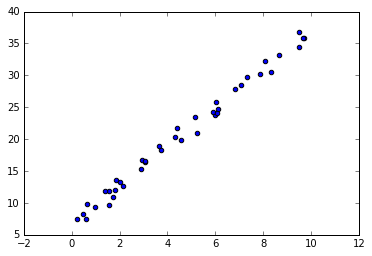

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gen = np.random.RandomState(42)
num_samples = 40

x = 10 * gen.rand(num_samples)
y = 3 * x + 7+ gen.randn(num_samples)
X = pd.DataFrame(x)

plt.scatter(x,y)

## Create your model  

Note the hyperparameter "fit_intercept".

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Slope: {}, Intercept: {}'.format(model.coef_, model.intercept_))

Slope: [ 3.0133901], Intercept: 6.860490998051624


## Check your model

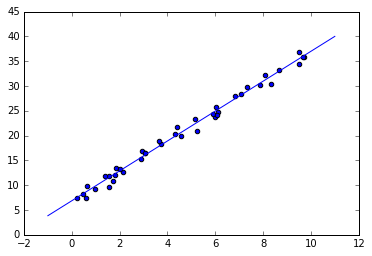

In [25]:
Xtest = pd.DataFrame(np.linspace(-1, 11))
predicted = model.predict(Xtest)

plt.scatter(x, y)
plt.plot(Xtest, predicted)

## A more real example: Linear Regression on the Diabetes Dataset

The diabetes dataset has 442 people's data: diabetes, age, sex, weight, blood pressure etc.

In [26]:
import numpy as np
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()

### Split diabetes into training and test sets

We're using only one feature here, and taking the last 20 datapoints as a test set. 

In [27]:
# Split the data into training and test sets
diabetes_X = diabetes.data
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training and test sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print("{} training points, {} test points".format(len(diabetes_X_train), 
len(diabetes_X_test)))

422 training points, 20 test points


### Run Linear Regression Algorithm

In [28]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### How good was your model?

Residual sum of squares: the mean-square-error

Explained variance score: 1 is perfect prediction. This model is going to need quite a bit of work.

In [29]:
print('Coefficients: ', regr.coef_)

print("Residual sum of squares: %.2f"
% np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

print('Explained variance score: %.2f' % regr.score(diabetes_X_test,
diabetes_y_test))

Coefficients:  [  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
Residual sum of squares: 2004.57
Explained variance score: 0.59


### Try that with just one input feature...

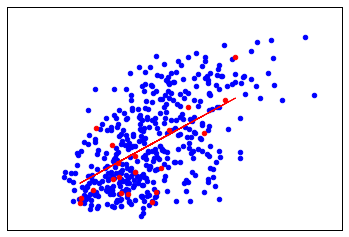

Coefficients:  [ 938.23786125]
Residual sum of squares: 2548.07
Explained variance score: 0.47


In [31]:
# Make a temporary train/test set with only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes1_X = diabetes_X[:, :, 2]
diabetes1_X_train = diabetes1_X[:-20]
diabetes1_X_test = diabetes1_X[-20:]

# Train a linear regression model on this data
regr = linear_model.LinearRegression()
regr.fit(diabetes1_X_train, diabetes_y_train)

# Look at the results
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(diabetes1_X_train, diabetes_y_train, color='blue')
plt.scatter(diabetes1_X_test, diabetes_y_test, color='red')
plt.plot(diabetes1_X_test, regr.predict(diabetes1_X_test),
color='red', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

# How good was this model?
print('Coefficients: ', regr.coef_)
print("Residual sum of squares: %.2f"
% np.mean((regr.predict(diabetes1_X_test) - diabetes_y_test) ** 2))
print('Explained variance score: %.2f' % regr.score(diabetes1_X_test,
diabetes_y_test))